In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import os


In [37]:
# Load datasets
customers = pd.read_csv(r'downloads\Customers.csv')
transactions = pd.read_csv(r'downloads\Transactions.csv')


In [38]:

# Preprocessing: Merging datasets on CustomerID
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')


In [39]:
# Feature Engineering: Aggregating data for each customer
customer_data = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price': 'mean',  # Average price per product bought
    'Region': 'first',  # Assuming all customers in the same region
}).reset_index()

In [40]:
# One-hot encoding for 'Region' column (categorical data)
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Scaling the data (Important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop(['CustomerID'], axis=1))


In [41]:
# Clustering with KMeans
os.environ["OMP_NUM_THREADS"] = "1"

kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)


C:\Users\sivak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
# Adding the cluster to original data
customer_data['Cluster'] = customer_data['Cluster'].astype(str)


In [43]:

# Clustering metrics: Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
silhouette = silhouette_score(scaled_data, customer_data['Cluster'])

# Print clustering metrics
print(f"Number of Clusters: {len(customer_data['Cluster'].unique())}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")



Number of Clusters: 4
Davies-Bouldin Index: 1.171469564407018
Silhouette Score: 0.3359017258064773


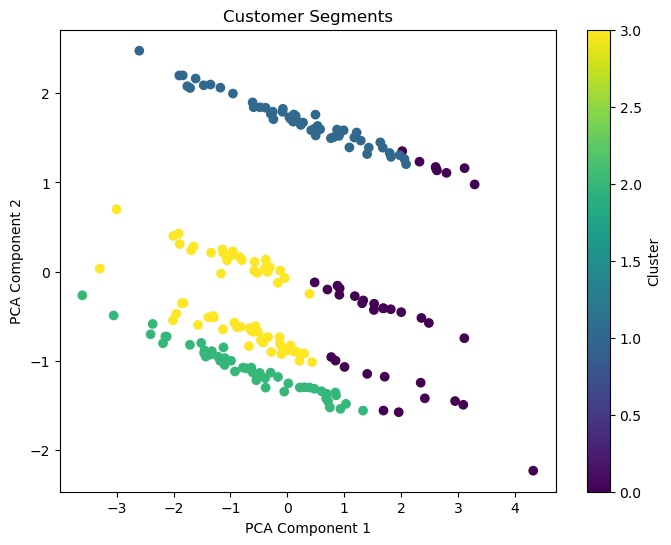

In [44]:
# Visualize the clusters (2D using PCA for simplicity)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plotting clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_data['Cluster'].astype(int), cmap='viridis')
plt.title("Customer Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()